# **Project Name**    -                    **🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce**



##                 **Project Type**    - ****Clustering + Recommendation + EDA****
##                 **Contribution**    - **Individual**


# **Problem Statement**
The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# **Project Summary -**

This project focuses on helping retailers gain insights into customer behavior and enhance sales through intelligent segmentation and personalized recommendations.

The solution is divided into two key modules:

Customer Segmentation:

Performed RFM (Recency, Frequency, Monetary) analysis on historical transaction data.

Applied K-Means clustering to categorize customers into actionable segments such as High-Value, Regular, Occasional, and At-Risk.

Enables businesses to tailor marketing strategies for different customer groups.

Product Recommendation:

Built an item-based collaborative filtering system using a Customer–Product matrix.

Calculated cosine similarity between products to recommend the top 5 similar items for a given product.

Helps improve cross-selling, up-selling, and user satisfaction.

The entire workflow is integrated into a dual-page Streamlit dashboard, providing interactive visualizations, segment prediction inputs, and instant product suggestions.

# **GitHub Link -** https://github.com/Gaurav215b/Shopper-Spectrum

.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("online_retail.csv")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2023-12-09 12:50:00,4.95,12680.0,France


In [6]:
Total_rows = df.shape[0]
Total_columns = df.shape[1]
print(f"Shape of the Dataset is {Total_rows} X {Total_columns}")

Shape of the Dataset is 541909 X 8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
duplicate = df.duplicated().sum()
print(f"The Number of Duplicate Values in rows of the Dataset is: {duplicate}")

The Number of Duplicate Values in rows of the Dataset is: 5268


In [9]:
columns = df.columns.tolist()
print(columns)

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [10]:
column_description = {
    "InvoiceNo" : "Transaction number",
    "StockCode" : "Unique product/item code",
    "Description" : "Name of the product",
    "Quantity" : "Number of products purchased",
    "InvoiceDate" : "Date and time of transaction (2022–2023)",
    "UnitPrice" : "Price per product",
    "CustomerID" : "Unique identifier for each customer",
    "Country" : "Country where the customer is based"
}

for col in columns:
    description = column_description.get(col, 'No Description Available')
    print(f"{col}: {description}")

InvoiceNo: Transaction number
StockCode: Unique product/item code
Description: Name of the product
Quantity: Number of products purchased
InvoiceDate: Date and time of transaction (2022–2023)
UnitPrice: Price per product
CustomerID: Unique identifier for each customer
Country: Country where the customer is based


In [11]:
Any_null = df.isnull().any()[df.isnull().any()]
print(f"Any Column with Null Values: \n{Any_null}")
Total_null = df.isnull().sum()[df.isnull().sum() > 0]
print(f"\nTotal Number of Null Values Per Columns:\n {Total_null}")

Any Column with Null Values: 
Description    True
CustomerID     True
dtype: bool

Total Number of Null Values Per Columns:
 Description      1454
CustomerID     135080
dtype: int64


In [12]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}' : ")
    print(df[col].unique())
    print(df[col].value_counts())


Unique values in 'InvoiceNo' : 
['536365' '536366' '536367' ... '581585' '581586' '581587']
InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

Unique values in 'StockCode' : 
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

Unique values in 'Description' : 
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING        

# Data Preprocessing

In [13]:
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2022-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2022-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2022-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2023-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2023-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2023-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2023-12-08 14:06:00,0.0,NaN,United Kingdom


This shows that Column UnitPrice contains Price of some products as 0

In [14]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


This shows that Column Quantity does not contains any 0 quantity

In [15]:
df = df[df['UnitPrice'] != 0]

In [16]:
Total_rows = df.shape[0]
Total_columns = df.shape[1]
print(f"Shape of the Dataset is {Total_rows} X {Total_columns}")

Shape of the Dataset is 539394 X 8


In [17]:
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


This shows that Column PriceUnit does not contains any 0 Price of the Product

In [18]:
df['InvoiceNo'].str.startswith('C').sum()

9288

In [19]:
df[df['InvoiceNo'].str.startswith('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


In [20]:
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]

In [21]:
df[df['InvoiceNo'].str.startswith('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [22]:
df = df.dropna(subset=['CustomerID'])

In [23]:
Total_rows = df.shape[0]
Total_columns = df.shape[1]
print(f"Shape of the Dataset is {Total_rows} X {Total_columns}")

Shape of the Dataset is 397884 X 8


# Exploratory Data Analysis (EDA): Data Visulaization

## Analyzing transaction volume by country

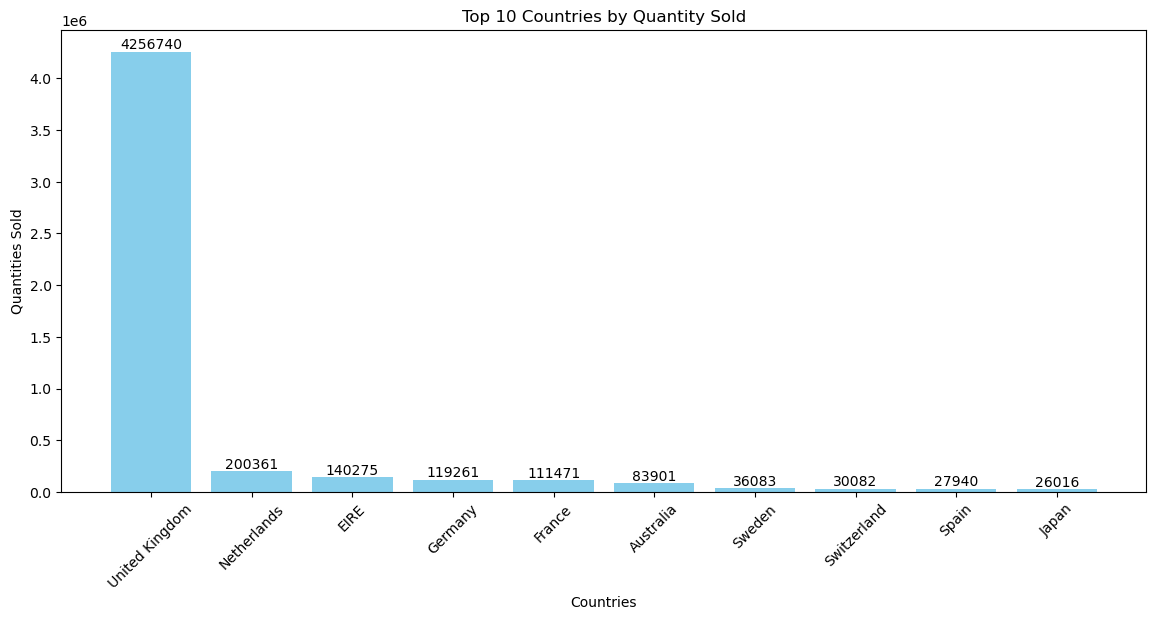

In [24]:
country_quantity = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
bars = plt.bar(country_quantity.head(10).index, country_quantity.head(10).values, color='skyblue')
plt.title("Top 10 Countries by Quantity Sold")
plt.xlabel("Countries")
plt.ylabel("Quantities Sold")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, int(height), ha='center', va='bottom')

plt.show()

## Identifying top-selling Products

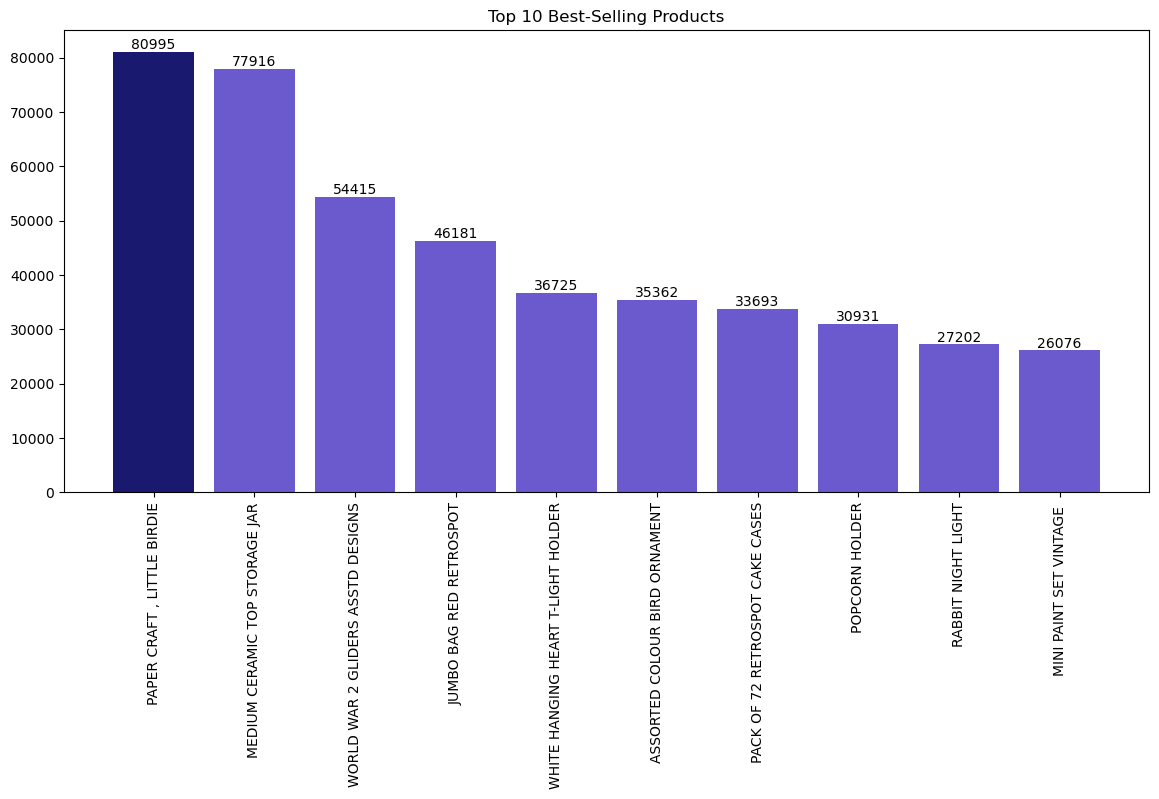

In [25]:
product_sales = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
colors = ['midnightblue'] + ['slateblue'] * 9
plt.figure(figsize=(14,6))
bars = plt.bar(product_sales.head(10).index, product_sales.head(10).values, color=colors)
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, int(height), ha='center', va='bottom')

plt.show()


## Visualizing the purchase trends over time

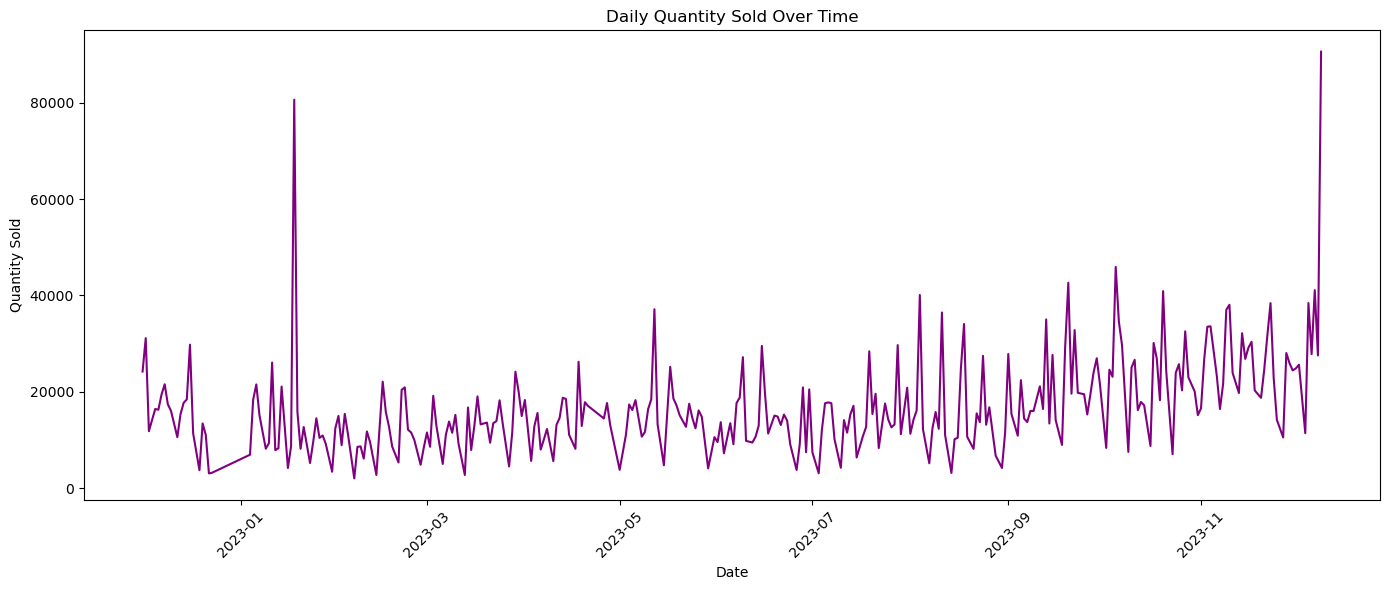

In [26]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Date"] = df["InvoiceDate"].dt.date

daily_quantity = df.groupby("Date")["Quantity"].sum()

plt.figure(figsize=(14,6))
plt.plot(daily_quantity.index, daily_quantity.values, color='purple')
plt.title("Daily Quantity Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Inspecting monetary distribution per transaction and customer

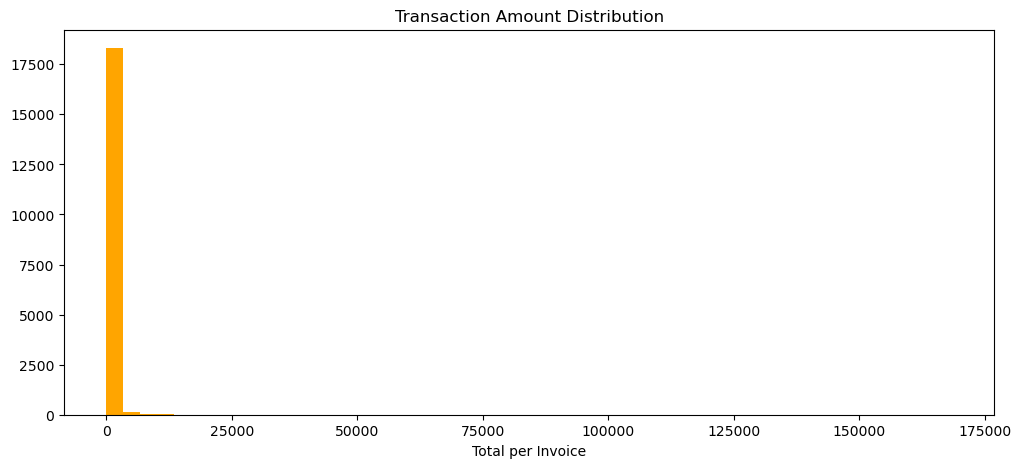

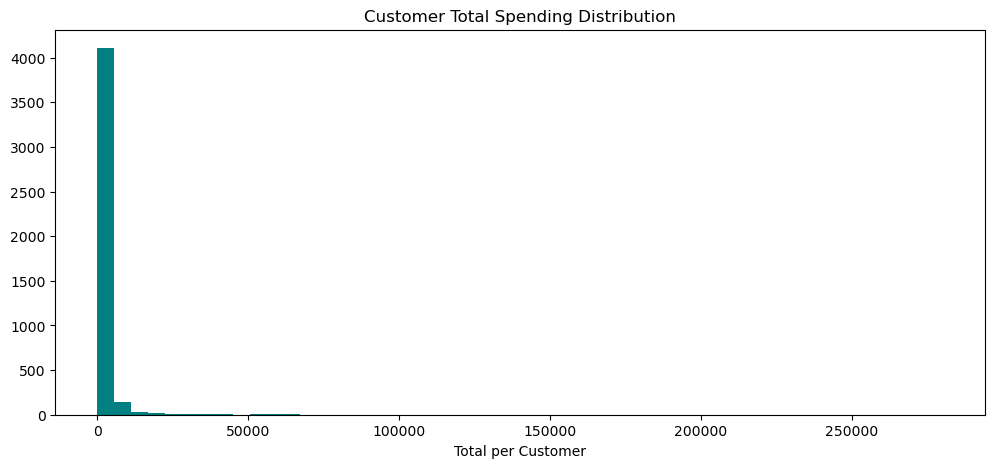

In [27]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

invoice_amount = df.groupby("InvoiceNo")["TotalPrice"].sum()
customer_amount = df.groupby("CustomerID")["TotalPrice"].sum()

plt.figure(figsize=(12,5))
plt.hist(invoice_amount, bins=50, color='orange')
plt.title("Transaction Amount Distribution")
plt.xlabel("Total per Invoice")
plt.show()

plt.figure(figsize=(12,5))
plt.hist(customer_amount, bins=50, color='teal')
plt.title("Customer Total Spending Distribution")
plt.xlabel("Total per Customer")
plt.show()


C:\Users\samay\AppData\Local\Temp\ipykernel_15640\660000675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='viridis')


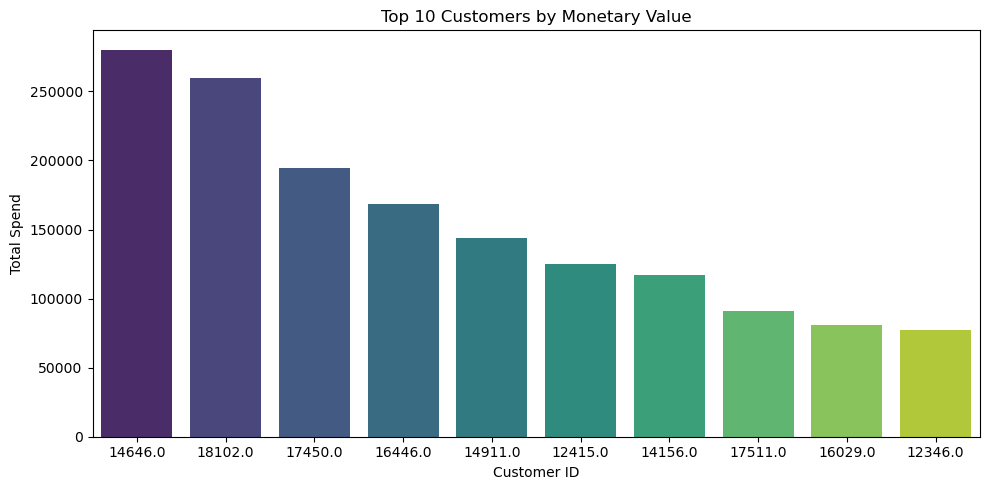

In [28]:
customer_spending = df.groupby("CustomerID")["TotalPrice"].sum()
top_customers = customer_spending.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='viridis')
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.title("Top 10 Customers by Monetary Value")
plt.tight_layout()
plt.show()

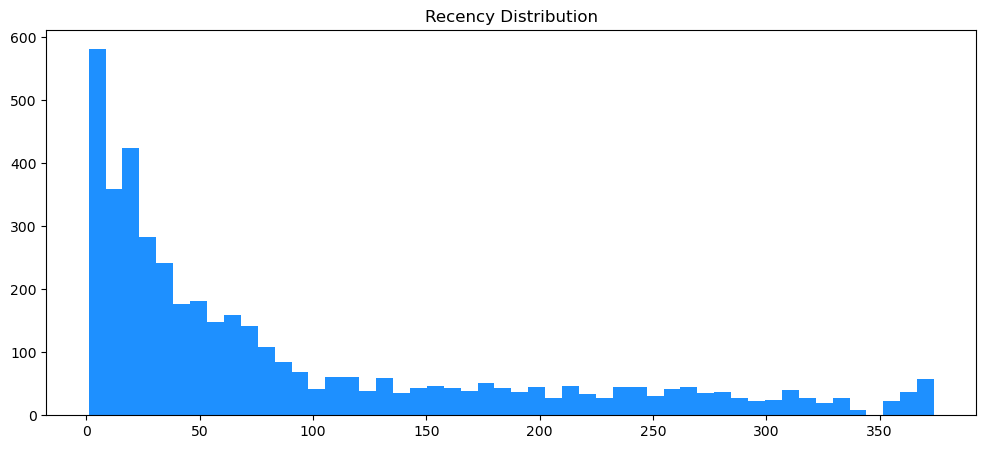

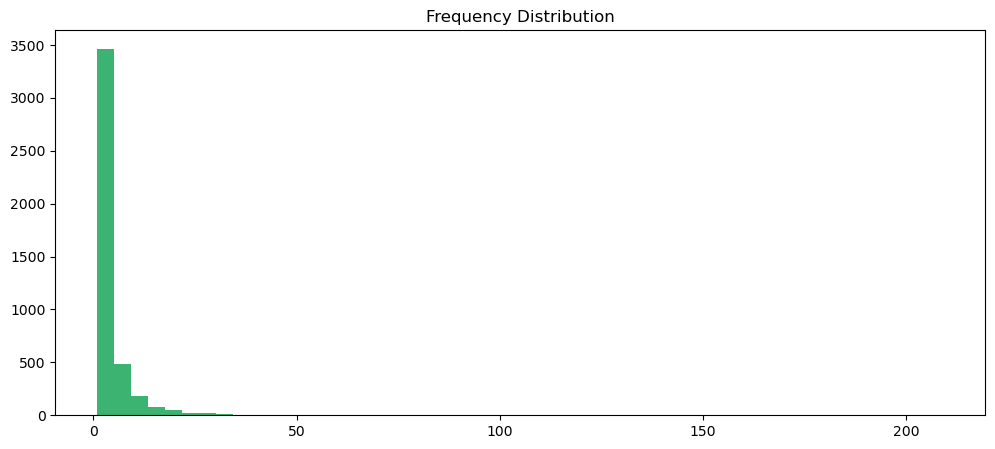

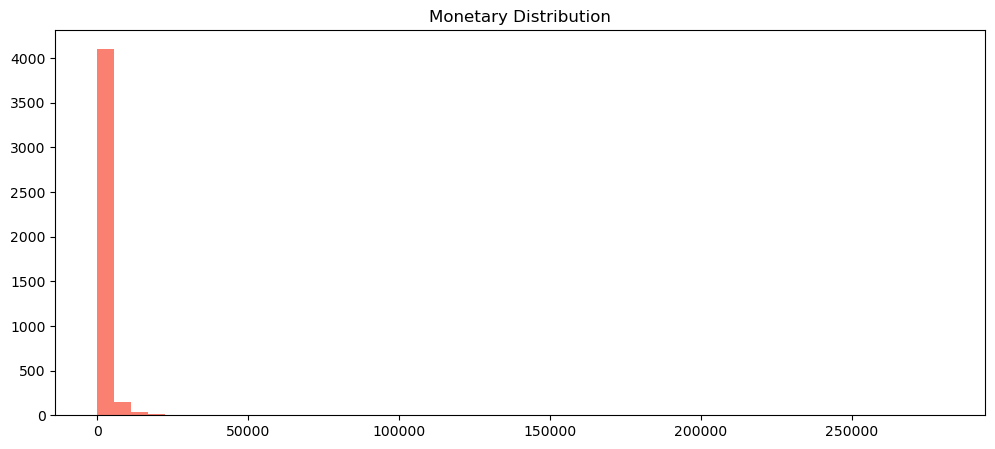

In [29]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
})
rfm.columns = ["Recency", "Frequency", "Monetary"]

plt.figure(figsize=(12,5))
plt.hist(rfm["Recency"], bins=50, color='dodgerblue')
plt.title("Recency Distribution")
plt.show()

plt.figure(figsize=(12,5))
plt.hist(rfm["Frequency"], bins=50, color='mediumseagreen')
plt.title("Frequency Distribution")
plt.show()

plt.figure(figsize=(12,5))
plt.hist(rfm["Monetary"], bins=50, color='salmon')
plt.title("Monetary Distribution")
plt.show()


In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

rfm.groupby("Cluster").mean().round(1)


,Recency,Frequency,Monetary
Cluster,,,
0,43.7,3.7,1359.0
1,248.1,1.6,480.6
2,7.4,82.5,127338.3
3,15.5,22.3,12709.1


In [34]:
segment_map = {0: 'Occasional', 1: 'High-Value', 2: 'Regular', 3: 'At-Risk'}
rfm["Segment"] = rfm["Cluster"].map(segment_map)


C:\Users\samay\anaconda3\envs\ml_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


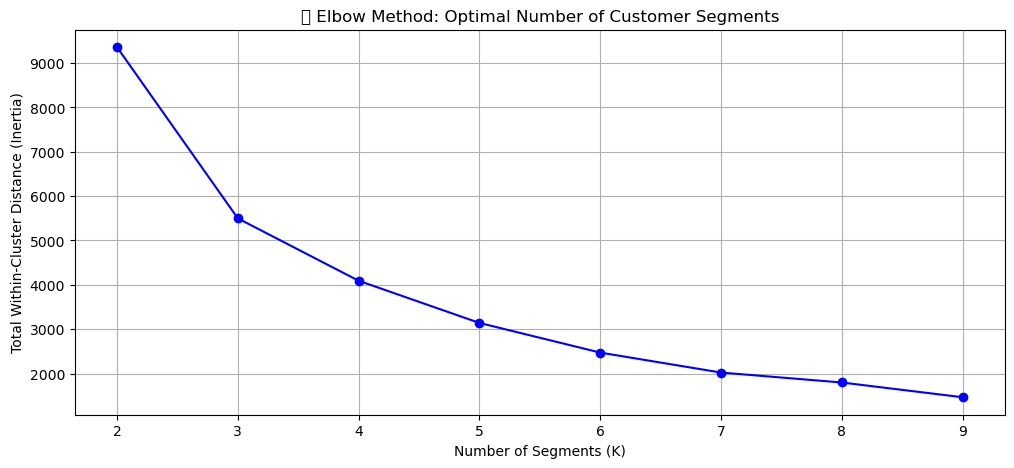

C:\Users\samay\anaconda3\envs\ml_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


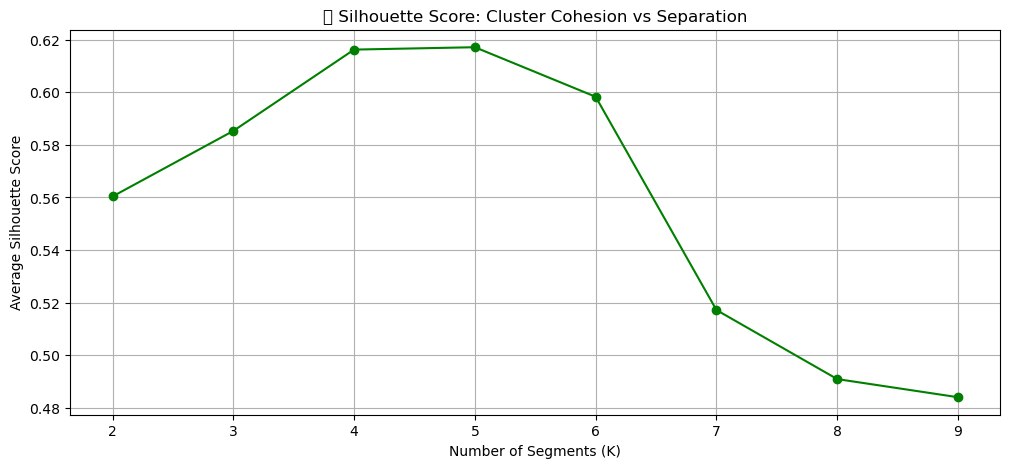

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Normalize RFM values
scaler = StandardScaler()
rfm_numeric = rfm[['Recency', 'Frequency', 'Monetary']]  # exclude 'Segment' or 'Cluster'
rfm_scaled = scaler.fit_transform(rfm_numeric)

# Step 2: Try multiple cluster values and record scores
inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, model.labels_))

# Step 3: Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.plot(K, inertia, 'bo-')
plt.title("📉 Elbow Method: Optimal Number of Customer Segments")
plt.xlabel("Number of Segments (K)")
plt.ylabel("Total Within-Cluster Distance (Inertia)")
plt.xticks(K)
plt.grid(True)
plt.show()

# Step 4: Plot Silhouette Score
plt.figure(figsize=(12, 5))
plt.plot(K, silhouette, 'go-')
plt.title("📈 Silhouette Score: Cluster Cohesion vs Separation")
plt.xlabel("Number of Segments (K)")
plt.ylabel("Average Silhouette Score")
plt.xticks(K)
plt.grid(True)
plt.show()


## Customer cluster profiles

In [36]:
import plotly.express as px

fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Segment',
    title='3D Customer Segmentation'
)
fig.show()


In [37]:
import pickle

with open("rfm_kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("rfm_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


## Product recommendation heatmap / similarity matrix

In [38]:
# Create a pivot table: rows = products, columns = customers, values = quantity
product_customer_matrix = df.pivot_table(
    index='Description',
    columns='CustomerID',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Cosine similarity between products
similarity_matrix = cosine_similarity(product_customer_matrix)

# Convert to DataFrame for labeling
product_similarity_df = pd.DataFrame(similarity_matrix,
                                     index=product_customer_matrix.index,
                                     columns=product_customer_matrix.index)


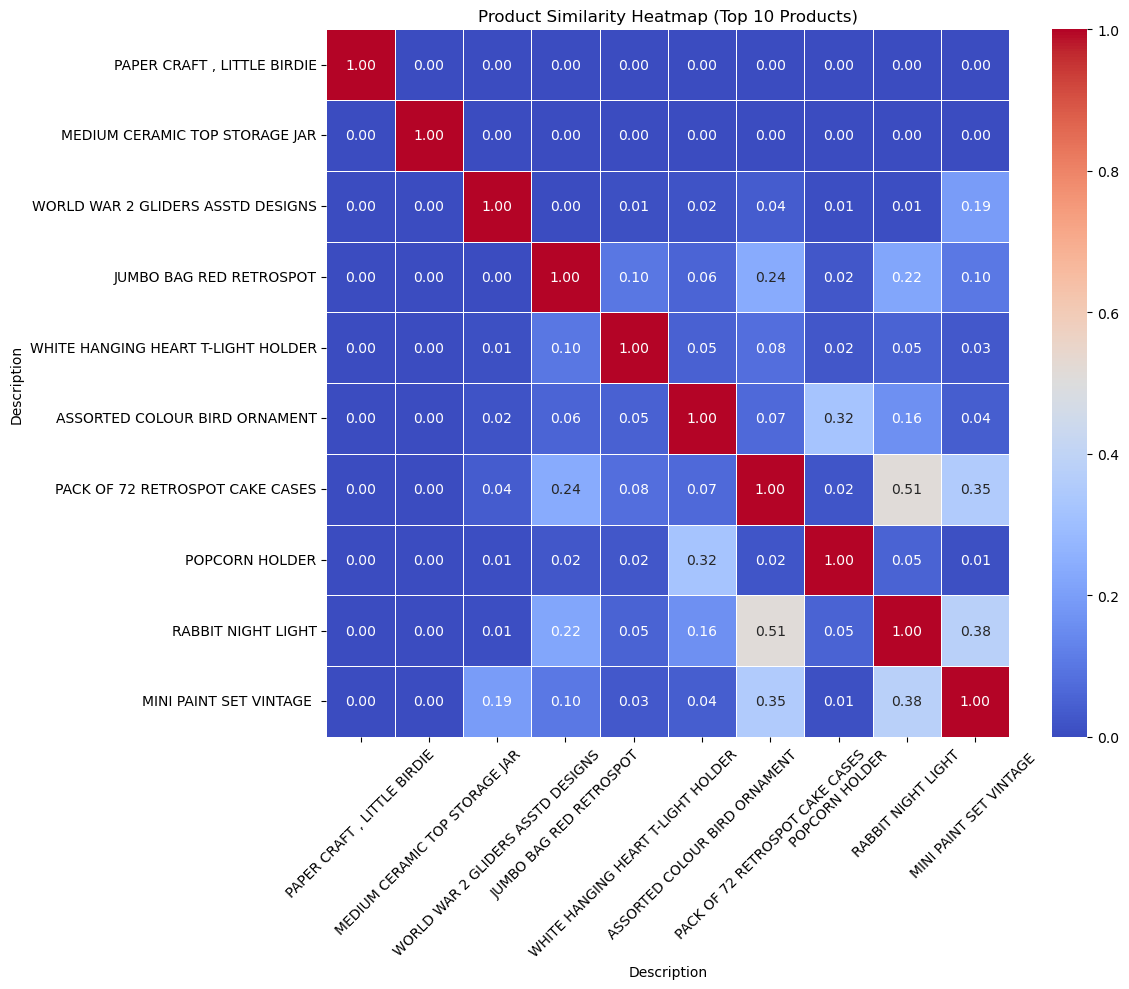

In [40]:
# Slice top 10 popular products (based on total quantity sold)
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10).index
top_sim_df = product_similarity_df.loc[top_products, top_products]

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_sim_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Product Similarity Heatmap (Top 10 Products)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
# Create pivot table: CustomerID x StockCode (binary: purchased or not)
basket = df.pivot_table(index='CustomerID', 
                        columns='StockCode', 
                        values='Quantity', 
                        aggfunc='sum').fillna(0)

# Convert to binary (0 or 1) — whether product was purchased
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)


C:\Users\samay\AppData\Local\Temp\ipykernel_15640\2493004034.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [42]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Transpose: products as rows
item_similarity = cosine_similarity(basket_binary.T)
item_similarity_df = pd.DataFrame(item_similarity, 
                                   index=basket_binary.columns, 
                                   columns=basket_binary.columns)


In [43]:
def recommend_products(product_code, top_n=5):
    if product_code not in item_similarity_df.columns:
        print("❌ Product code not found.")
        return []
    
    # Sort by similarity score
    similar_scores = item_similarity_df[product_code].sort_values(ascending=False)
    
    # Skip the product itself (first row)
    recommended = similar_scores.iloc[1:top_n+1]
    
    return recommended


In [44]:
# Example usage
product_code = '85123A'  # Replace with any valid StockCode
recommendations = recommend_products(product_code)

print(f"🔁 Products similar to {product_code}:")
print(recommendations)


🔁 Products similar to 85123A:
StockCode
21733    0.543485
22804    0.493058
22470    0.411281
22469    0.379811
82482    0.362919
Name: 85123A, dtype: float64


In [45]:
# Map StockCode to Description
product_lookup = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

def get_product_names(codes):
    return product_lookup.loc[codes].dropna()['Description']

# Print readable recommendations
print("📦 Recommended Products:")
print(get_product_names(recommendations.index))


📦 Recommended Products:
StockCode
21733     RED HANGING HEART T-LIGHT HOLDER
22804      CANDLEHOLDER PINK HANGING HEART
22804    PINK HANGING HEART T-LIGHT HOLDER
22470                HEART OF WICKER LARGE
22469                HEART OF WICKER SMALL
82482    WOODEN PICTURE FRAME WHITE FINISH
Name: Description, dtype: object


In [46]:
basket = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(basket.T)
similarity_df = pd.DataFrame(similarity_matrix, index=basket.columns, columns=basket.columns)

# Save
with open("similarity_matrix.pkl", "wb") as f:
    pickle.dump(similarity_df, f)


In [47]:
rfm.to_csv("data/rfm_segmented.csv", index=False)